In [74]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt
import constants as pc

### Data Analysis

import 1D numerical hydrodynamics code and define an object that will store our simulation

In [75]:
# import a code file hydro3.py
import hydro3_mesa_JK as hydro3
args = {'hname':'z25.0','htype':'zero','noplot':1}
h = hydro3.lagrange_hydro_1d(**args)
h.itype=h.HEGER

### Initial and Boundary conditions

In [77]:
h.bctype=[h.INFLOW, h.OUTFLOW]
h.setup_initial_conditions()
h.initialize_boundary_conditions()

header:  ['grid', 'cell', 'outer', 'total', 'mass', 'cell', 'outer', 'radius', 'cell', 'outer', 'velocity', 'cell', 'density', 'cell', 'temperature', 'cell', 'pressure', 'cell', 'specific', 'energy', 'cell', 'specific', 'entropy', 'cell', 'angular', 'velocity', 'cell', 'A_bar', 'cell', 'Y_e', 'stability', 'NETWORK', 'neutrons', 'H1', 'He3', 'He4', 'C12', 'N14', 'O16', 'Ne20', 'Mg24', 'Si28', 'S32', 'Ar36', 'Ca40', 'Ti44', 'Cr48', 'Fe52', 'Fe54', 'Ni56', 'Fe56', "'Fe'"]
r inner:  405255076.7768671


### Run the hydro code from t = 0s to t = 10^4 s, saving the result every 1000s.

In [78]:
tstep = []
total = []

for h.t_stop in range(10 ** 4):
    while h.t_stop % 1e3 == 0:
        h.run()
        print(h.t_stop)
        tstep.append(h.t_stop)
        total.append(copy.deepcopy(h))
        break

     0 0.000e+00 1.625e-03
4.476e+33 2.500e+01 1.156e+48 2.890e+51 -3.204e+51 -3.120e+50
0
   100 1.617e-01 1.609e-03
4.476e+33 2.500e+01 1.675e+48 2.893e+51 -3.213e+51 -3.181e+50
   200 3.217e-01 1.591e-03
4.476e+33 2.500e+01 2.292e+48 2.898e+51 -3.225e+51 -3.248e+50
   300 4.800e-01 1.572e-03
4.476e+33 2.500e+01 3.026e+48 2.903e+51 -3.238e+51 -3.321e+50
   400 6.362e-01 1.551e-03
4.476e+33 2.500e+01 3.908e+48 2.910e+51 -3.254e+51 -3.403e+50
   500 7.902e-01 1.528e-03
4.476e+33 2.500e+01 4.981e+48 2.918e+51 -3.272e+51 -3.494e+50
   600 9.417e-01 1.502e-03
4.476e+33 2.500e+01 6.301e+48 2.927e+51 -3.293e+51 -3.596e+50
   700 1.090e+00 1.472e-03
4.476e+33 2.500e+01 7.954e+48 2.939e+51 -3.318e+51 -3.713e+50
   800 1.236e+00 1.438e-03
4.476e+33 2.500e+01 1.006e+49 2.952e+51 -3.347e+51 -3.848e+50
   900 1.378e+00 1.398e-03
4.476e+33 2.500e+01 1.283e+49 2.968e+51 -3.381e+51 -4.006e+50
  1000 1.515e+00 1.351e-03
4.476e+33 2.500e+01 1.657e+49 2.987e+51 -3.423e+51 -4.196e+50
  1100 1.648e+00 1.

In [81]:
print(h.zones.v)

[-4.22573059e+08 -2.84897424e+08 -2.31558308e+08 -2.00081379e+08
 -1.78162240e+08 -1.61514981e+08 -1.48268005e+08 -1.37212492e+08
 -1.27750357e+08 -1.19620575e+08 -1.12297501e+08 -1.05792968e+08
 -9.99432621e+07 -9.44406491e+07 -8.95712278e+07 -8.48565620e+07
 -8.05841419e+07 -7.65397660e+07 -7.26527536e+07 -6.91454334e+07
 -6.55490284e+07 -6.24545683e+07 -5.90952580e+07 -5.63206705e+07
 -5.31609839e+07 -5.06275281e+07 -4.76641706e+07 -4.52657520e+07
 -4.25551585e+07 -4.01427209e+07 -3.77755421e+07 -3.52369827e+07
 -3.32086385e+07 -3.06030389e+07 -2.86915413e+07 -2.62903025e+07
 -2.41777733e+07 -2.21936588e+07 -1.97726600e+07 -1.80856654e+07
 -1.56761779e+07 -1.37667125e+07 -1.18383760e+07 -9.46673900e+06
 -7.88016035e+06 -5.44000690e+06 -3.74420645e+06 -1.54409118e+06
  2.74679156e+05  2.23262054e+06  3.82499181e+06  5.64311756e+06
  6.50071032e+06  8.43645976e+06  8.60847895e+06  1.02367090e+07
  1.15366401e+07  1.13992458e+07  1.37601502e+07  1.48895522e+07
  1.29543125e+07  9.55040

### Propose hypothesis

#### During core collapse, massive stars lose pressure support and collapse on roughly the free-fall timescale at each radius. 

### Test hypothesis by analyzing the data

/home/jhub/.conda/envs/hubenv/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


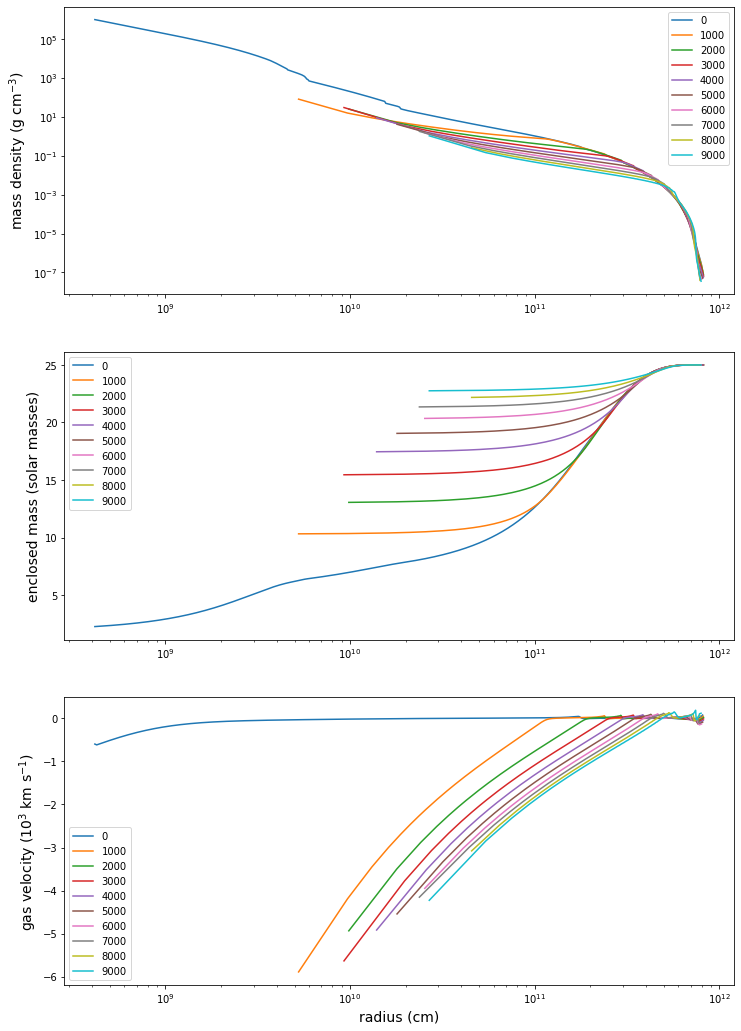

In [69]:
mp = 1.67e-24
kb = 1.38e-16
m_sun = 1.99e33
# Given content

figure, ax = plt.subplots(3, 1, figsize=(12,18))
# Plot Configuration

for n, t in zip(total, tstep):
    r_n = n.zones.r
    v_n = n.zones.v
    e_n = n.zones.e
    rho_n = n.zones.d
    mcum_n = n.zones.mcum
    p_n = (n.gamma-1.)*e_n*rho_n
    
    ax[0].loglog(r_n, rho_n, label=f'{t}')
    ax[1].semilogx(r_n, mcum_n/pc.m_sun, label=f'{t}')
    ax[2].semilogx(r_n, v_n/1e8, label=f'{t}')
    
    ax[0].set_ylabel(r'mass density (g cm$^{-3}$)', fontsize=14)
    ax[1].set_ylabel(r'enclosed mass (solar masses)',fontsize=14)
    ax[2].set_ylabel(r'gas velocity (10$^3$ km s$^{-1}$)',fontsize=14)
    ax[2].set_xlabel(r'radius (cm)', fontsize=14)
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()